In [82]:
import matplotlib.pyplot as plt
import numpy as np
import os

from tqdm import tqdm
import glob
import seaborn as sns
import cv2
import io

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import ipywidgets as widgets
from tensorflow.keras.utils import to_categorical

# architecture Pare
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import classification_report, confusion_matrix

In [83]:
labels = ["broadleaf", "grass", "soil", "soybean"]

In [84]:
X  =[] 
Y = [] 
image_size = (227, 227)

for i in labels:
    Datasetspath = "../input/weed-detection-in-soybean-crops/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(len(fileRead))
    
    for file in fileRead:
        image = cv2.imread(file)
        img = cv2.resize(image, image_size)
        X.append(img)
        Y.append(i)
X = np.array(X)
Y = np.array(Y)

../input/weed-detection-in-soybean-crops/dataset/broadleaf/
1191
../input/weed-detection-in-soybean-crops/dataset/grass/
3520
../input/weed-detection-in-soybean-crops/dataset/soil/
3249
../input/weed-detection-in-soybean-crops/dataset/soybean/
7376


In [85]:
for i in labels:
    Datasetspath = "../input/weed-detection-in-soybean-crops/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(fileRead[1])
#     break

../input/weed-detection-in-soybean-crops/dataset/broadleaf/
../input/weed-detection-in-soybean-crops/dataset/broadleaf/274.tif
../input/weed-detection-in-soybean-crops/dataset/grass/
../input/weed-detection-in-soybean-crops/dataset/grass/659.tif
../input/weed-detection-in-soybean-crops/dataset/soil/
../input/weed-detection-in-soybean-crops/dataset/soil/659.tif
../input/weed-detection-in-soybean-crops/dataset/soybean/
../input/weed-detection-in-soybean-crops/dataset/soybean/5623.tif


In [86]:
X.shape, Y.shape

((15336, 227, 227, 3), (15336,))

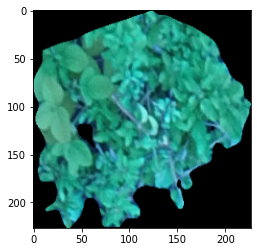

In [87]:
plt.imshow(X[0])

In [88]:
print(Y[0])

broadleaf


In [89]:
Temp_y = []
for i in Y:
    Temp_y.append(labels.index(i))
Y = to_categorical(Temp_y)
Y[0]

array([1., 0., 0., 0.], dtype=float32)

In [90]:
Y.shape

(15336, 4)

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [92]:
X_train.shape, Y_train.shape

((10735, 227, 227, 3), (10735, 4))

In [93]:
X_test.shape, Y_test.shape

((4601, 227, 227, 3), (4601, 4))

In [94]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [95]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Load MobileNet pre-trained on ImageNet data
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Create a Sequential model
models = Sequential()

# Add MobileNet layers to the model
models.add(mobilenet_model)

# Add Global Average Pooling layer
models.add(GlobalAveragePooling2D())

# Add Dense layers for classification
models.add(Dense(4096, activation='relu'))
models.add(Dense(4096, activation='relu'))
models.add(Dense(4, activation='softmax'))


17235968/17225924 [==============================] - 1s 0us/step


In [96]:
models.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 4096)              4198400   
_________________________________________________________________
dense_13 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 16388     
Total params: 24,224,964
Trainable params: 24,203,076
Non-trainable params: 21,888
_________________________________________________________________


In [97]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [98]:
models.compile(loss = "categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy"])

In [99]:
history = models.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 10, batch_size = 2, verbose = 1)

Epoch 1/10
5368/5368 [==============================] - 115s 21ms/step - loss: 0.3872 - accuracy: 0.8674 - val_loss: 0.0906 - val_accuracy: 0.9820
Epoch 2/10
5368/5368 [==============================] - 112s 21ms/step - loss: 0.1363 - accuracy: 0.9563 - val_loss: 0.2076 - val_accuracy: 0.9763
Epoch 3/10
5368/5368 [==============================] - 112s 21ms/step - loss: 0.0984 - accuracy: 0.9732 - val_loss: 0.1162 - val_accuracy: 0.9863
Epoch 4/10
5368/5368 [==============================] - 110s 21ms/step - loss: 0.0673 - accuracy: 0.9813 - val_loss: 0.2057 - val_accuracy: 0.9528
Epoch 5/10
5368/5368 [==============================] - 111s 21ms/step - loss: 0.0560 - accuracy: 0.9853 - val_loss: 0.2167 - val_accuracy: 0.9370
Epoch 6/10
5368/5368 [==============================] - 111s 21ms/step - loss: 0.0518 - accuracy: 0.9860 - val_loss: 0.1138 - val_accuracy: 0.9752
Epoch 7/10
5368/5368 [==============================] - 111s 21ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0

Model Accuracy



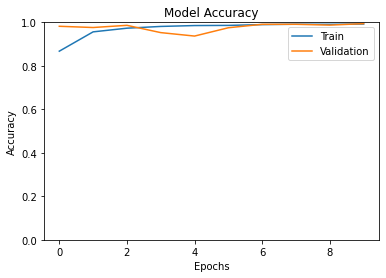

In [100]:
ax = plt.gca()
ax.set_ylim([0, 1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss



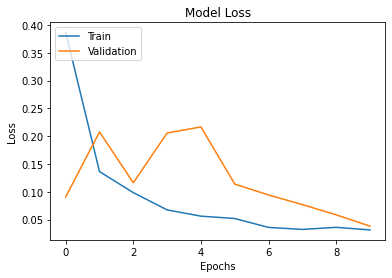

In [101]:
ax = plt.gca()
# ax.set_ylim([0, 1])
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [103]:
models.save('MobileNet_model.h5')